# The Dataset
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd 
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Understanding the Data

**DATA DESCRIPTION**


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# What we learn from this Data

- The dataset contains information about passengers on the Spaceship Titanic, including personal details, amenities used, and whether they were transported to another dimension.
- The target variable is "Transported," indicating whether a passenger was transported to another dimension.

In [3]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## So these are Numericals columns 

In [4]:
data.describe(include=['object','bool'])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody,True
freq,1,4602,5439,8,5915,8291,2,4378


### Finding some intricate details of the dataset

In [5]:
print("Minimum Age : ",data[data['Age'] > 0]['Age'].min())
print("\nCabin wise distribution of passengers : \n",data['Cabin'].value_counts())


Minimum Age :  1.0

Cabin wise distribution of passengers : 
 Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64


# Important Note 

**.describe()** is one of most important methods which tells so much about data 

In [6]:
#null values 
data.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

# Data Analysis 

## Univariate Analysis



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creating arrays of categorical and numerical columns
categorical_cols=data.describe(include=['object','bool']).columns
numericals_cols=data.describe().columns

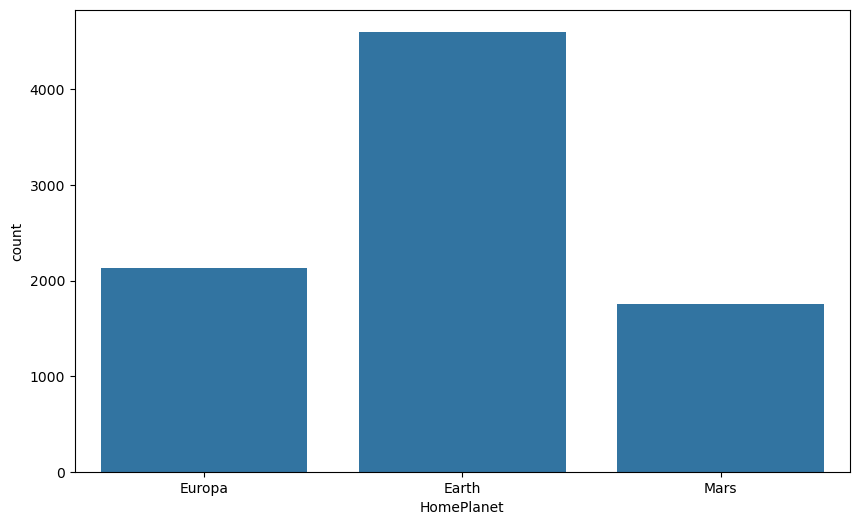

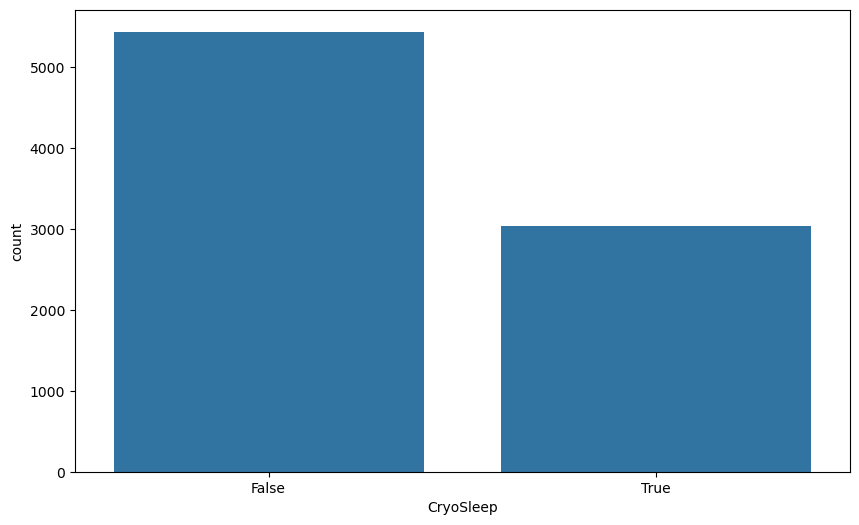

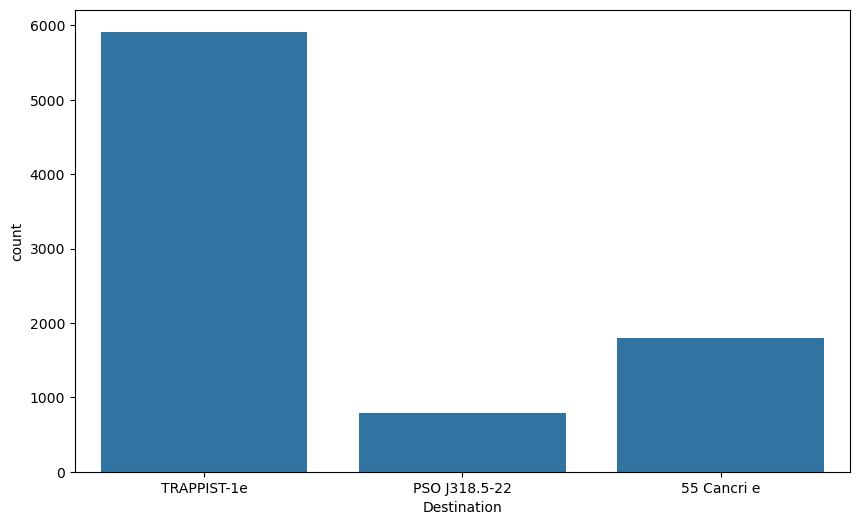

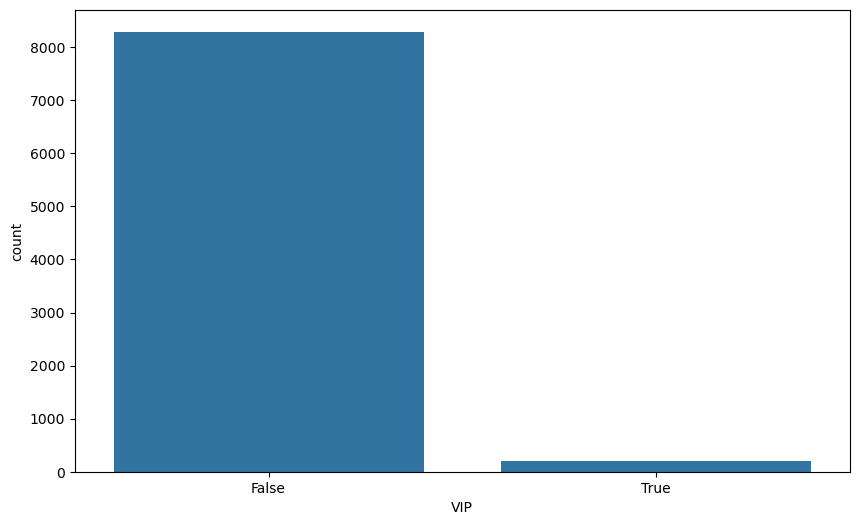

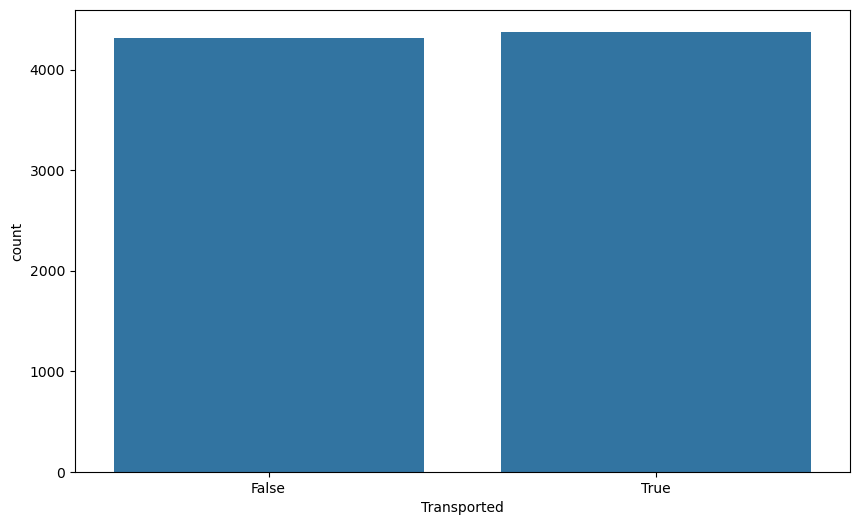

In [8]:
#Now analysing Categoricals Values 

for col in categorical_cols:
    if col not in ['PassengerId','Name','Cabin']:
        plt.figure(figsize=(10 , 6) )
        sns.countplot(data = data , x = col )
        plt.show()


# Note  
- countplot are most helpul for analysing the categorical


In [9]:
#binning
data['Age_Label']=pd.cut(data['Age'],bins=[0,10,20,30,40,50,60,70,80],labels=['Age1','Age2','Age3','Age4','Age5','Age6','Age7','Age8'])

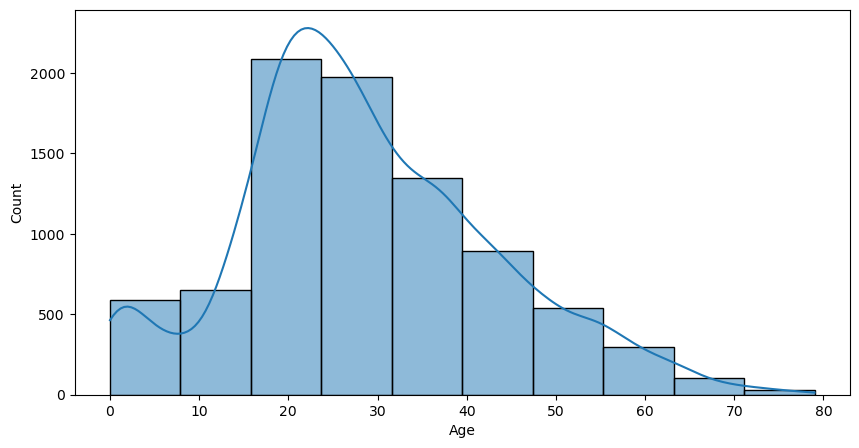

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Age',kde=True,bins=10)
plt.show()


# Bivariate Analysis


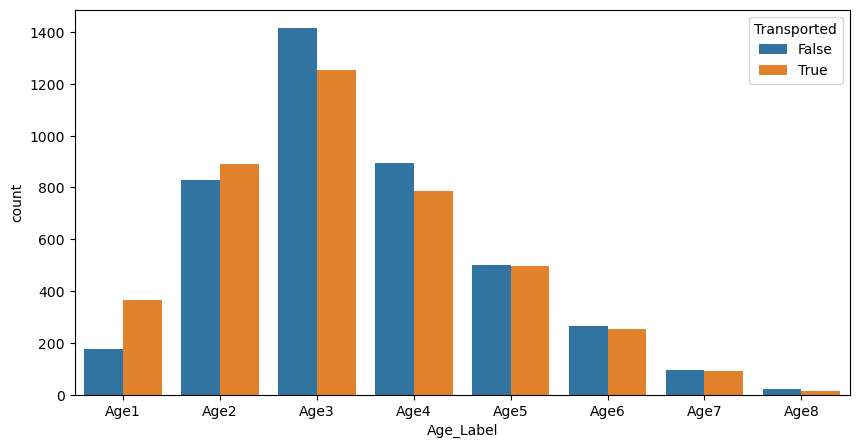

In [11]:
#age group vs transport
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Age_Label',hue='Transported')
plt.show()

## this graphs looks balanced  except group 1 , 3 , 4


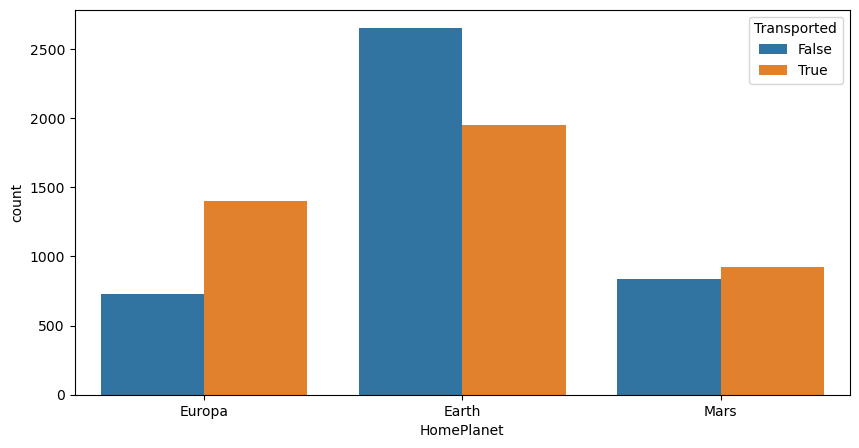

In [12]:
#Transport or not vs HomePlanet
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='HomePlanet', hue='Transported')
plt.show()

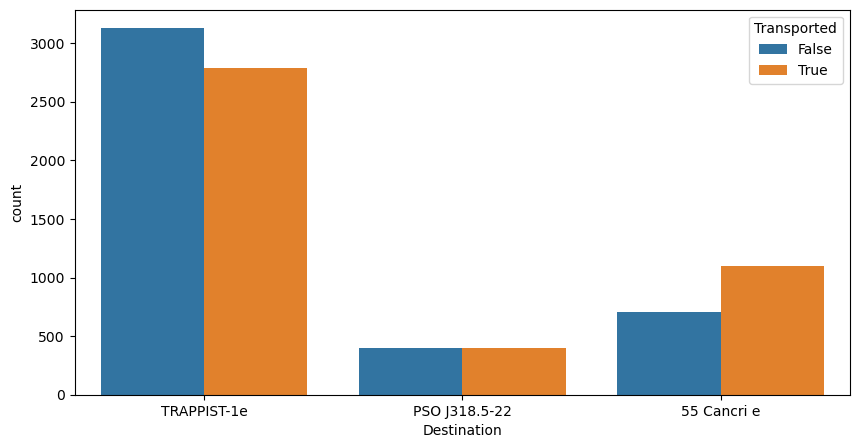

In [13]:
#Transport vs Destination
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Destination', hue='Transported')
plt.show()

-The people who has destination as Cancri are transported more as per ration 

<Axes: xlabel='Age_Label', ylabel='lux_expense'>

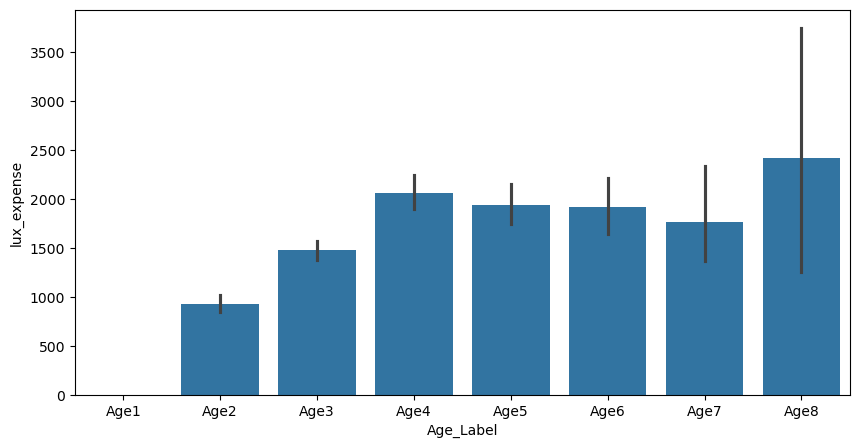

In [14]:
luxuxy = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
data['lux_expense']=data[luxuxy].sum(axis=1)
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Age_Label', y='lux_expense')

*as the age increases , it increases the number of luxury used by them*

# Observing something on cabin data 


In [15]:
data['Deck']=data['Cabin'].str.split('/',expand=True)[0]
data['Side']=data['Cabin'].str.split('/',expand=True)[2]

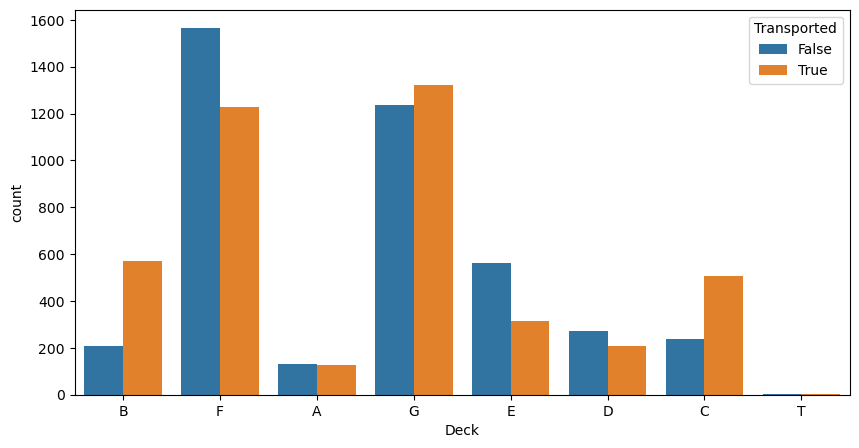

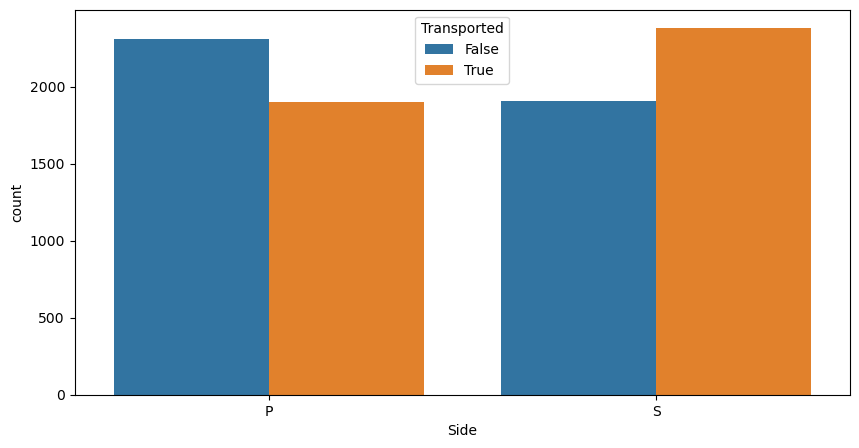

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Deck', hue='Transported')
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Side', hue='Transported')
plt.show()

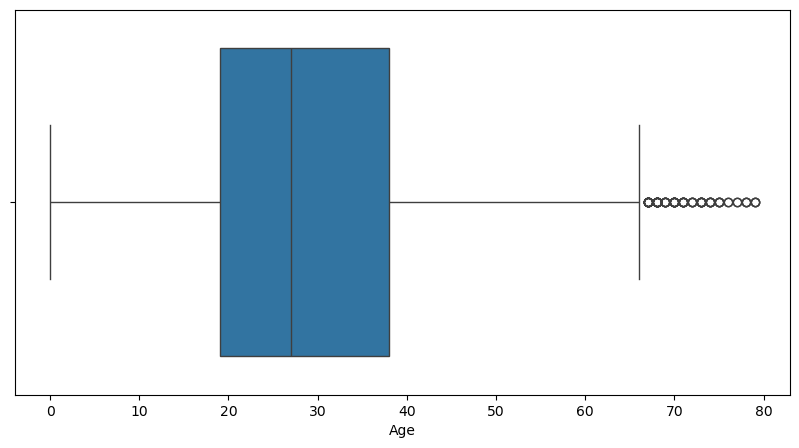

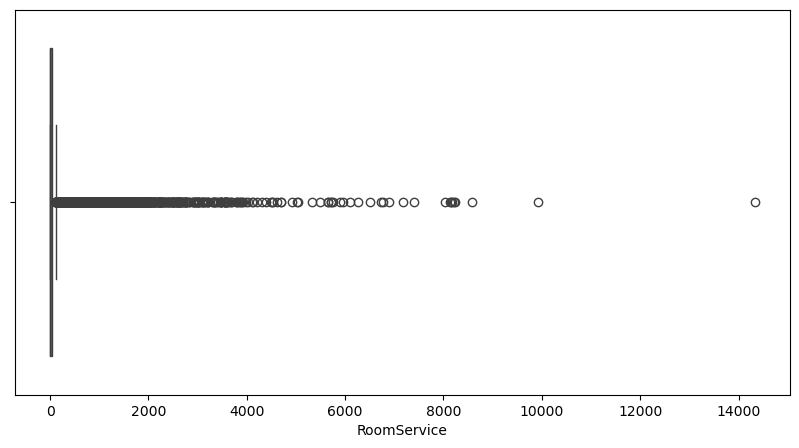

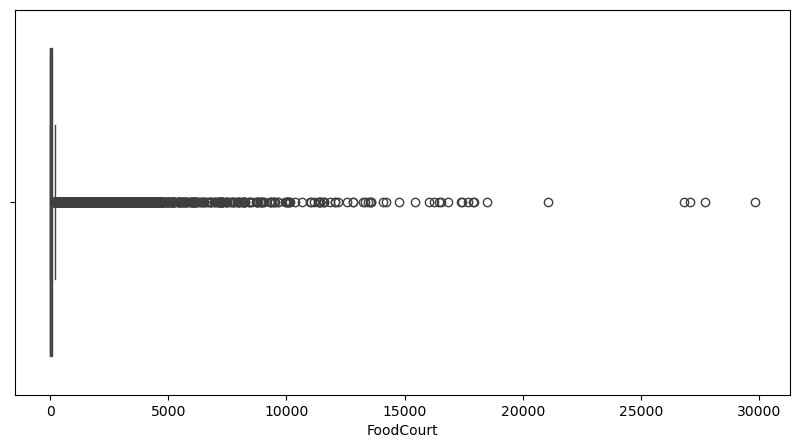

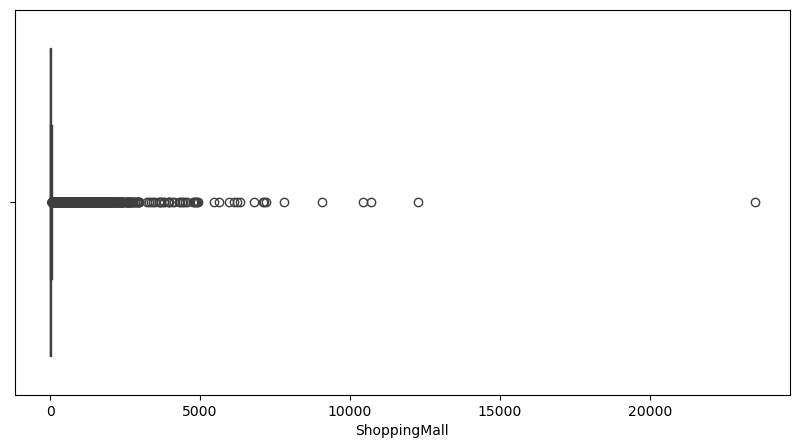

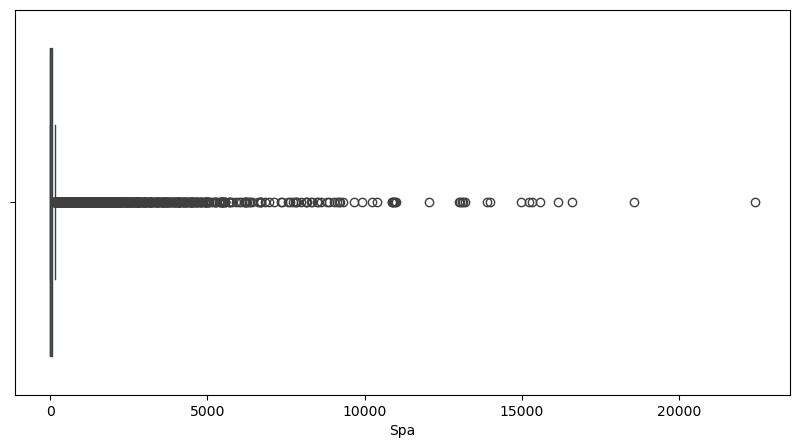

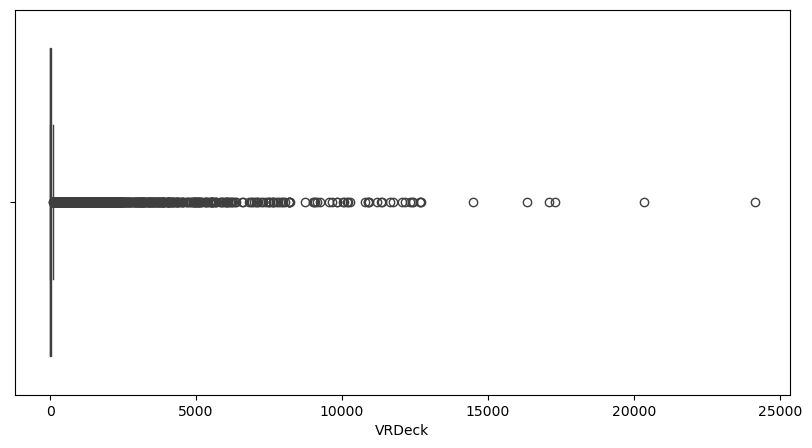

In [ ]:
#Detecting the outlier
for col in numericals_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data=data, x=col)
  plt.show()

* All vip columns has huge amount of outlier 

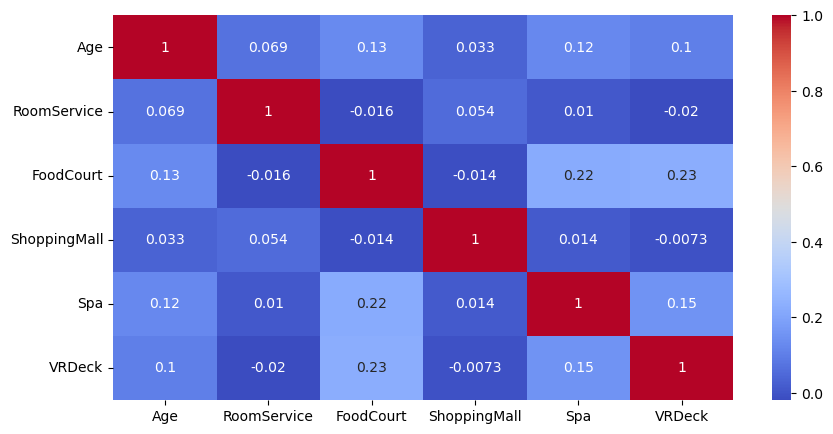

In [23]:
# And  at last plot a heat map 
plt.figure(figsize=(10, 5))
cols = [col for col in numericals_cols if col not in ['Name', 'PassengerId', 'Age', 'Cabin']]
sns.heatmap(data[numericals_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

* A more detailed plot using objects cols

In [24]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
categorical_cols2=data.describe(include=['object','bool']).columns
for i in categorical_cols2:
  if i not in ['Name','PassengerId','Cabin']:
    data[i]=l.fit_transform(data[i])

data['Age_Label']=l.fit_transform(data['Age_Label'])

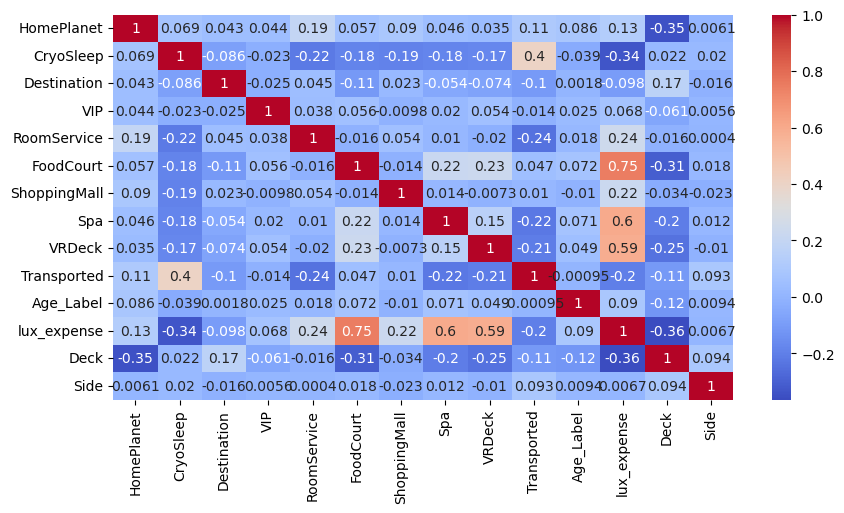

In [25]:
plt.figure(figsize=(10, 5))
cols = [col for col in data.columns if col not in ['Name', 'PassengerId', 'Age', 'Cabin']]
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# That's the eda 